In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adadelta, Adam, Adagrad, Adamax, Nadam, RMSprop 
from tensorflow.keras.losses import mse

#from google.colab import drive
#drive.mount('/content/drive')
# Import Dataset
dataset_path = 'insurance.csv'

raw_dataset = pd.read_csv(dataset_path)
# Create a dataset instant
dataset = raw_dataset.copy()

# Split data into train/test
# p = training data portion
p=0.8
trainDataset = dataset.sample(frac=p,random_state=1234)
testDataset = dataset.drop(trainDataset.index)

class haltCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('loss') <= 0.05):
            print("\n\n\nReached 0.05 loss value so cancelling training!\n\n\n")
            self.model.stop_training = True



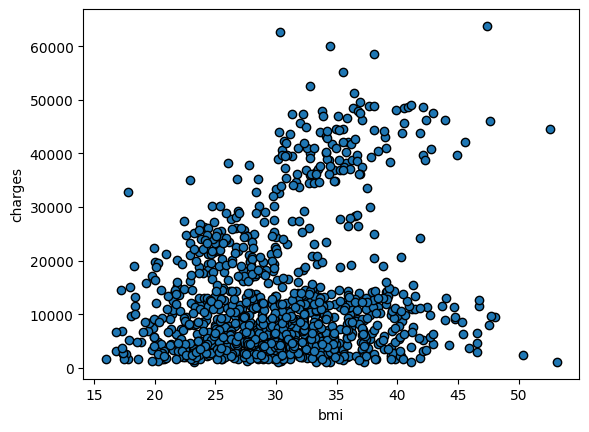

In [2]:
# Visualizing training data
fig, ax = plt.subplots()
x = trainDataset['bmi']
y = trainDataset['charges']
ax.scatter(x, y, edgecolors=(0, 0, 0))
ax.set_xlabel('bmi')
ax.set_ylabel('charges')
plt.show()

In [3]:
trainInput = trainDataset['bmi']
trainTarget = trainDataset['charges']
testInput = testDataset['bmi']
testTarget = testDataset['charges']

In [4]:
#converting to numpy
trainInput = np.array(trainInput).reshape(-1,1)
trainTarget = np.array(trainTarget)
print(trainInput.shape,trainTarget.shape)


(1070, 1) (1070,)


1338
>0 f([0.12920153]) = 0.06018
>1 f([0.15603752]) = 0.05656
>2 f([0.17940711]) = 0.05351
>3 f([0.20586537]) = 0.05106
>4 f([0.22749234]) = 0.04854
>5 f([0.25033399]) = 0.04667
>6 f([0.27105099]) = 0.04488
>7 f([0.29010189]) = 0.04342
>8 f([0.30762359]) = 0.04222
>9 f([0.32523393]) = 0.04123
>10 f([0.34154617]) = 0.04035
>11 f([0.35629658]) = 0.03964
>12 f([0.36950303]) = 0.03908
>13 f([0.38134672]) = 0.03864
>14 f([0.39240801]) = 0.03831
>15 f([0.40263808]) = 0.03804
>16 f([0.41229078]) = 0.03784
>17 f([0.4206076]) = 0.03768
>18 f([0.4282435]) = 0.03757
>19 f([0.43499413]) = 0.03749
>20 f([0.44282083]) = 0.03744
>21 f([0.44831346]) = 0.03740
>22 f([0.45334798]) = 0.03738
>23 f([0.45846731]) = 0.03738
>24 f([0.46238771]) = 0.03739
>25 f([0.46602365]) = 0.03740
>26 f([0.46823522]) = 0.03741
>27 f([0.47045389]) = 0.03742
>28 f([0.47314993]) = 0.03744
>29 f([0.47509704]) = 0.03746
>30 f([0.47581195]) = 0.03747
>31 f([0.4779981]) = 0.03748
>32 f([0.4779265]) = 0.03750
>33 f([0.47954281])

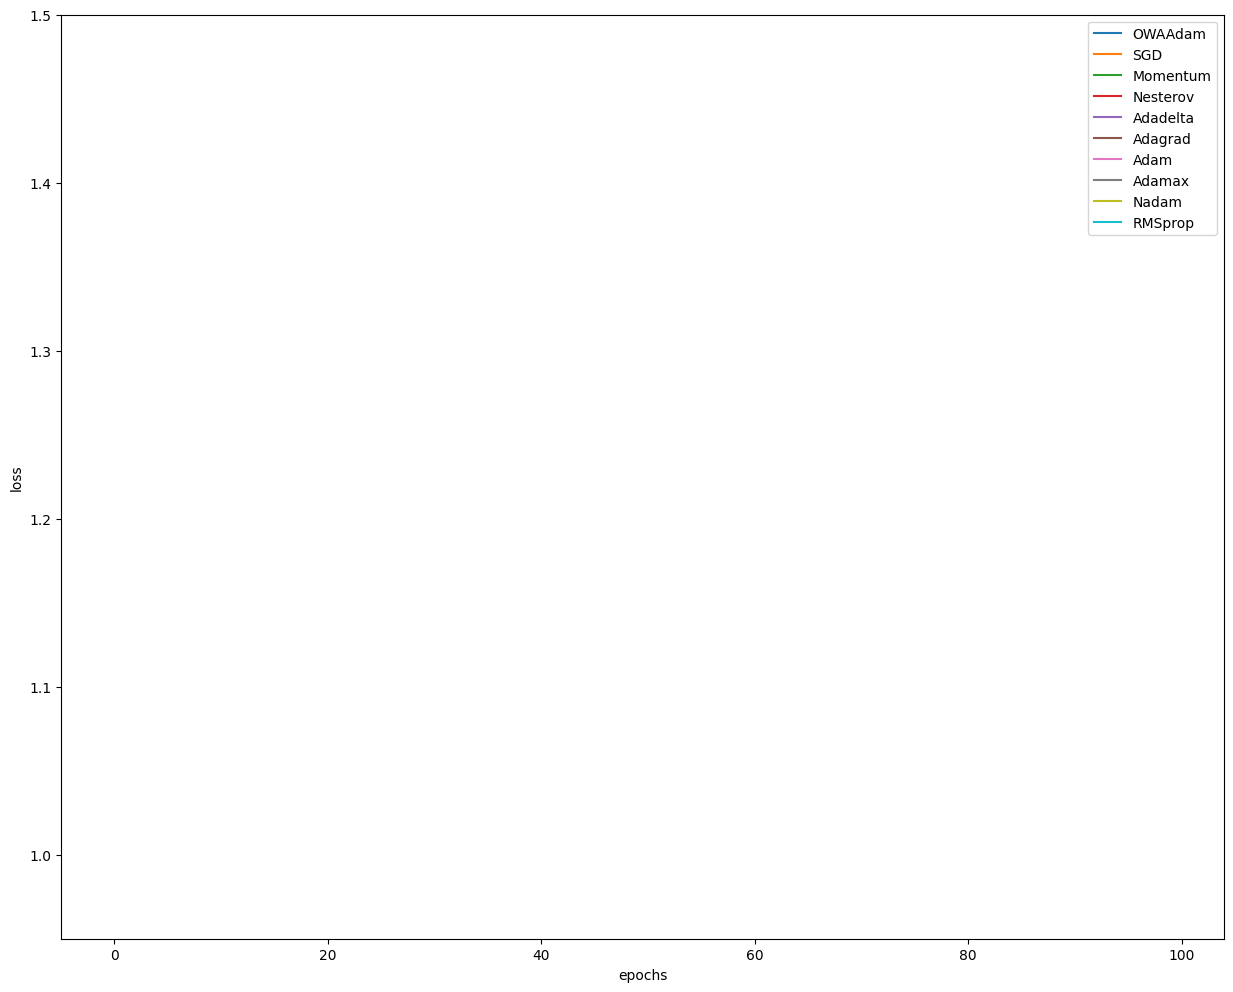

In [7]:
from math import sqrt
from numpy import asarray
from numpy import arange
from numpy.random import rand
from numpy.random import seed
from numpy import meshgrid
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

dataset_path = 'insurance.csv'

raw_dataset = pd.read_csv(dataset_path)
# Create a dataset instant
dataset = raw_dataset.copy()

# Split data into train/test
# p = training data portion
p=1
trainDataset = dataset.sample(frac=p,random_state=1234)
testDataset = dataset.drop(trainDataset.index)


# Visualizing training data


x = trainDataset['bmi']
y = trainDataset['charges']
from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

x = sx.fit_transform(x.values.reshape(x.shape[0],1))
y = sy.fit_transform(y.values.reshape(y.shape[0],1))

plt.figure(figsize = (15,12))
# objective function
def mean_squared_error(y_true, y_predicted):
     
    # Calculating the loss or cost
    cost = np.sum((y_true-y_predicted)**2) / len(y_true)
    return cost
 
# derivative of objective function
def derivative(x, y, y_predicted):
  weight_derivative = -(2/n) * sum(x * (y-y_predicted))
  return weight_derivative
 
# gradient descent algorithm with adam2
def adam(x, y, mean_squared_error, derivative, n_iter, alpha, eps=1e-8):
  solutions = list()
  m = 0
  v = 0
  current_weight = 0.1  
     
  costs = []
  weights = []
  previous_cost = None
  der = []
  der2 = []
  for t in range(n_iter):
   
    y_predicted = (current_weight * x)
    current_cost = mean_squared_error(y, y_predicted)
    #if previous_cost and abs(previous_cost-current_cost)<=eps:
            #break
         
    previous_cost = current_cost
 
    costs.append(current_cost)
    weights.append(current_weight)
    current_cost = mean_squared_error(y, y_predicted)
		# calculate gradient g(t)
    
    g = derivative(x, y, y_predicted)

    der2.append(g**2)
    
    der.reverse()
    n2=len(der2)
    der.append(g)
    
    der.reverse()
    n=len(der)

    arr = (np.random.dirichlet(np.ones(n+1),size=1))
    c=arr[0]
    c.sort()
    
    wa1=0
    for i in range (0,len(der)):
      wa1=wa1+der[i]*c[len(c)-1-i]

    arr2 = (np.random.dirichlet(np.ones(n+1),size=1))
    c2=arr2[0]
    c2.sort()
    
    wa2=0
    for j in range (0,len(der2)):
      wa2=wa2+der2[j]*c2[len(c2)-1-j]

    beta1=sum(c[0:n-1])
    beta2=sum(c2[0:n-1])
    #print(beta1)

		# m(t) = beta1 * m(t-1) + (1 - beta1) * g(t)
    m = wa1 + (1.0 - beta1) * g
		# v(t) = beta2 * v(t-1) + (1 - beta2) * g(t)^2
    v = wa2 + (1.0 - beta2) * g**2
		# mhat(t) = m(t) / (1 - beta1(t))
    mhat = m / (1.0 - beta1**(t+1))
		# vhat(t) = v(t) / (1 - beta2(t))
    vhat = v / (1.0 - beta2**(t+1))
		# x(t) = x(t-1) - alpha * mhat(t) / (sqrt(vhat(t)) + ep)
    current_weight = current_weight - alpha * mhat / (sqrt(vhat) + eps)
		# evaluate candidate point
    score = mean_squared_error(y, y_predicted)
		# keep track of solutions
    solutions.append(current_weight.copy())
		# report progress
    print('>%d f(%s) = %.5f' % (t, current_weight, score))
    
  #plt.figure(figsize = (8,6))
  #plt.plot(weights, costs)
  plt.plot(costs, label='loss')
  return costs, weights
 

# define the total iterations
n_iter = 50
# steps size
alpha = 0.02
# factor for average gradient
beta1a = 0.9
# factor for average squared gradient
beta2a = 0.999

x = np.array(x)
y = np.array(y)

n=len(x)
print(n)

# perform the gradient descent search with adam
cost, weight = adam(x, y, mean_squared_error, derivative, n_iter, alpha, eps=1e-8)

#print(cost)




#Creating Sequential Model
model = Sequential()
model.add(Dense(1))


#SGD
# Use the required optimizer to compile the model
print("Printing behins here: ----------------")
model.compile(optimizer=SGD(learning_rate=0.001,momentum=0.0,
    nesterov=False,),loss=mse)
train = model.fit(trainInput,trainTarget,epochs=100)

#loss over time
plt.plot(train.history['loss'],label='loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend('SGD')

#Momentum
#Creating Sequential Model
print("Printing behins here: ----------------")
model = Sequential()
model.add(Dense(1))
# Use the required optimizer to compile the model
model.compile(optimizer=SGD(learning_rate=0.001,momentum=0.9,
    nesterov=False,),loss=mse)
train = model.fit(trainInput,trainTarget,epochs=100)

#loss over time
plt.plot(train.history['loss'],label='loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend('Momentum')


#Nesterov
#Creating Sequential Model
print("Printing behins here: ----------------")
model = Sequential()
model.add(Dense(1))
# Use the required optimizer to compile the model
model.compile(optimizer=SGD(learning_rate=0.001,momentum=0.0,
    nesterov=True,),loss=mse)
train = model.fit(trainInput,trainTarget,epochs=100)

#loss over time
plt.plot(train.history['loss'],label='loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend('Nesterov')


#Adadelta
#Creating Sequential Model
print("Printing behins here: ----------------")
model = Sequential()
model.add(Dense(1))
# Use the required optimizer to compile the model
model.compile(optimizer=Adadelta(learning_rate=0.001,
    rho=0.95, epsilon=1e-07,),loss=mse)
train = model.fit(trainInput,trainTarget,epochs=100)

#loss over time
plt.plot(train.history['loss'],label='loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend('Adadelta')

#Adagrad
#Creating Sequential Model
print("Printing behins here: ----------------")
model = Sequential()
model.add(Dense(1))
# Use the required optimizer to compile the model
model.compile(optimizer=Adagrad(
    learning_rate=0.001,
    initial_accumulator_value=0.1,
    epsilon=1e-07),loss=mse)
train = model.fit(trainInput,trainTarget,epochs=100)

#loss over time
plt.plot(train.history['loss'],label='loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend('Adagrad')



#Adam
#Creating Sequential Model
print("Printing behins here: ----------------")
model = Sequential()
model.add(Dense(1))
# Use the required optimizer to compile the model
model.compile(optimizer=Adam(learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,),loss=mse)
train = model.fit(trainInput,trainTarget,epochs=100)

#loss over time
plt.plot(train.history['loss'],label='loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend('Adam')


#Adamax
#Creating Sequential Model
print("Printing behins here: ----------------")
model = Sequential()
model.add(Dense(1))
# Use the required optimizer to compile the model
model.compile(optimizer=Adamax(learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,),loss=mse)
train = model.fit(trainInput,trainTarget,epochs=100)

#loss over time
plt.plot(train.history['loss'],label='loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend('Adamax')


#Nadam
#Creating Sequential Model
print("Printing behins here: ----------------")
model = Sequential()
model.add(Dense(1))
# Use the required optimizer to compile the model
model.compile(optimizer=Nadam(learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,),loss=mse)
train = model.fit(trainInput,trainTarget,epochs=100)

#loss over time
plt.plot(train.history['loss'],label='loss')
plt.xlabel('epochs')
plt.ylabel('loss')




#RMSporp
#Creating Sequential Model
print("Printing behins here: ----------------")
model = Sequential()
model.add(Dense(1))
# Use the required optimizer to compile the model
model.compile(optimizer=RMSprop(
    learning_rate=0.001,
    rho=0.9,
    momentum=0.0,
    epsilon=1e-07,),loss=mse)
train = model.fit(trainInput,trainTarget,epochs=100)

#loss over time
plt.plot(train.history['loss'],label='loss')
plt.xlabel('epochs')
plt.ylim(0.95,1.5)
plt.ylabel('loss')



plt.legend(['OWAAdam','SGD','Momentum','Nesterov', 'Adadelta','Adagrad', 'Adam', 'Adamax','Nadam','RMSprop'], loc ="upper right")
# plt.legend(['OWAAdam', 'Adam'], loc ="upper right")
